In [1]:
import pandas as pd
import random
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,10)

assessment_data = pd.read_csv('assessments.csv')
courses_data = pd.read_csv('courses.csv')
student_assessment_data = pd.read_csv('studentAssessment.csv')
student_info_data = pd.read_csv('studentInfo.csv')
student_registration_data = pd.read_csv('studentRegistration.csv')

assessment_data.head()
courses_data.head()
student_assessment_data.head()
student_info_data.head()
student_registration_data.head()

student_registration_data.isnull().sum()

In [2]:
assessment_data = pd.read_csv('assessments.csv', usecols=['code_module', 'code_presentation', 'id_assessment', 'date','assessment_type', 'weight'])
courses_data = pd.read_csv('courses.csv', usecols=['code_module', 'code_presentation', 'module_presentation_length'])
student_assessment_data = pd.read_csv('studentAssessment.csv', usecols=['id_assessment', 'id_student', 'date_submitted', 'is_banked', 'score'])
student_info_data = pd.read_csv('studentInfo.csv', usecols=['code_module', 'code_presentation', 'id_student', 'num_of_prev_attempts', 'studied_credits', 'final_result'])
student_registration_data = pd.read_csv('studentRegistration.csv', usecols=['code_module', 'code_presentation', 'id_student', 'date_registration', 'date_unregistration'])
student_vle = pd.read_csv('StudentVle.csv', usecols=['code_module', 'code_presentation','id_student','date','sum_click'])

In [3]:
# Merge DataFrames
merged_data = pd.merge(assessment_data, courses_data, on=['code_module', 'code_presentation'], how='inner')
merged_data = pd.merge(merged_data, student_assessment_data, on='id_assessment', how='inner')
merged_data = pd.merge(merged_data, student_info_data, on=['code_module', 'code_presentation', 'id_student'], how='inner')
merged_data = pd.merge(merged_data, student_registration_data, on=['code_module', 'code_presentation', 'id_student'], how='inner')
merged_data =  pd.merge(merged_data, student_vle, on=['code_module', 'code_presentation', 'id_student'], how='inner')

In [4]:
merged_data.head()

,code_module,code_presentation,id_assessment,assessment_type,date_x,weight,module_presentation_length,id_student,date_submitted,is_banked,score,num_of_prev_attempts,studied_credits,final_result,date_registration,date_unregistration,date_y,sum_click
0,AAA,2013J,1752,TMA,19.0,10.0,268,11391,18,0,78.0,0,240,Pass,-159.0,NaN,-5,16
1,AAA,2013J,1752,TMA,19.0,10.0,268,11391,18,0,78.0,0,240,Pass,-159.0,NaN,-5,44
2,AAA,2013J,1752,TMA,19.0,10.0,268,11391,18,0,78.0,0,240,Pass,-159.0,NaN,-5,1
3,AAA,2013J,1752,TMA,19.0,10.0,268,11391,18,0,78.0,0,240,Pass,-159.0,NaN,-5,2
4,AAA,2013J,1752,TMA,19.0,10.0,268,11391,18,0,78.0,0,240,Pass,-159.0,NaN,-5,1


In [5]:
# Reorder the columns
df1 = merged_data[['id_student', 'id_assessment', 'code_module', 'code_presentation', 
         'date_registration', 'date_unregistration', 'num_of_prev_attempts', 
         'studied_credits', 'assessment_type', 'date_x', 'weight', 
         'module_presentation_length', 'date_submitted', 'is_banked', 'score', 'date_y','sum_click','final_result']]


In [6]:
df1.head()

,id_student,id_assessment,code_module,code_presentation,date_registration,date_unregistration,num_of_prev_attempts,studied_credits,assessment_type,date_x,weight,module_presentation_length,date_submitted,is_banked,score,date_y,sum_click,final_result
0,11391,1752,AAA,2013J,-159.0,NaN,0,240,TMA,19.0,10.0,268,18,0,78.0,-5,16,Pass
1,11391,1752,AAA,2013J,-159.0,NaN,0,240,TMA,19.0,10.0,268,18,0,78.0,-5,44,Pass
2,11391,1752,AAA,2013J,-159.0,NaN,0,240,TMA,19.0,10.0,268,18,0,78.0,-5,1,Pass
3,11391,1752,AAA,2013J,-159.0,NaN,0,240,TMA,19.0,10.0,268,18,0,78.0,-5,2,Pass
4,11391,1752,AAA,2013J,-159.0,NaN,0,240,TMA,19.0,10.0,268,18,0,78.0,-5,1,Pass


In [7]:
missing_data = df1.isnull()

In [8]:
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

id_student
False    2944419
Name: id_student, dtype: int64

id_assessment
False    2944419
Name: id_assessment, dtype: int64

code_module
False    2944419
Name: code_module, dtype: int64

code_presentation
False    2944419
Name: code_presentation, dtype: int64

date_registration
False    2944419
Name: date_registration, dtype: int64

date_unregistration
True     2841277
False     103142
Name: date_unregistration, dtype: int64

num_of_prev_attempts
False    2944419
Name: num_of_prev_attempts, dtype: int64

studied_credits
False    2944419
Name: studied_credits, dtype: int64

assessment_type
False    2944419
Name: assessment_type, dtype: int64

date_x
False    2944419
Name: date_x, dtype: int64

weight
False    2944419
Name: weight, dtype: int64

module_presentation_length
False    2944419
Name: module_presentation_length, dtype: int64

date_submitted
False    2944419
Name: date_submitted, dtype: int64

is_banked
False    2944419
Name: is_banked, dtype: int64

score
False    2942929
True

In [9]:
df1.isnull().sum()

id_student                          0
id_assessment                       0
code_module                         0
code_presentation                   0
date_registration                   0
date_unregistration           2841277
num_of_prev_attempts                0
studied_credits                     0
assessment_type                     0
date_x                              0
weight                              0
module_presentation_length          0
date_submitted                      0
is_banked                           0
score                            1490
date_y                              0
sum_click                           0
final_result                        0
dtype: int64

In [10]:
total_rows = len(df1)
print("Total number of rows in the CSV file:", total_rows)

Total number of rows in the CSV file: 2944419


In [11]:
rows_with_null_score = df1[df1['date_unregistration'].isnull()]

# Display the filtered rows
print(rows_with_null_score)

         id_student  id_assessment code_module code_presentation  \
0             11391           1752         AAA             2013J   
1             11391           1752         AAA             2013J   
2             11391           1752         AAA             2013J   
3             11391           1752         AAA             2013J   
4             11391           1752         AAA             2013J   
...             ...            ...         ...               ...   
2944414     2662716          14998         BBB             2013J   
2944415     2662716          14998         BBB             2013J   
2944416     2662716          14998         BBB             2013J   
2944417     2662716          14998         BBB             2013J   
2944418     2662716          14998         BBB             2013J   

         date_registration  date_unregistration  num_of_prev_attempts  \
0                   -159.0                  NaN                     0   
1                   -159.0           

In [12]:
df2 = df1.dropna(subset=['score','date_x','date_registration'])

In [13]:
total_rows = len(df2)
print("Total number of rows in the CSV file:", total_rows)

Total number of rows in the CSV file: 2942929


In [14]:
df3 = df2.drop(['date_unregistration'],axis='columns')

In [15]:
df3.isnull().sum()

id_student                    0
id_assessment                 0
code_module                   0
code_presentation             0
date_registration             0
num_of_prev_attempts          0
studied_credits               0
assessment_type               0
date_x                        0
weight                        0
module_presentation_length    0
date_submitted                0
is_banked                     0
score                         0
date_y                        0
sum_click                     0
final_result                  0
dtype: int64

In [16]:
df3.head()

,id_student,id_assessment,code_module,code_presentation,date_registration,num_of_prev_attempts,studied_credits,assessment_type,date_x,weight,module_presentation_length,date_submitted,is_banked,score,date_y,sum_click,final_result
0,11391,1752,AAA,2013J,-159.0,0,240,TMA,19.0,10.0,268,18,0,78.0,-5,16,Pass
1,11391,1752,AAA,2013J,-159.0,0,240,TMA,19.0,10.0,268,18,0,78.0,-5,44,Pass
2,11391,1752,AAA,2013J,-159.0,0,240,TMA,19.0,10.0,268,18,0,78.0,-5,1,Pass
3,11391,1752,AAA,2013J,-159.0,0,240,TMA,19.0,10.0,268,18,0,78.0,-5,2,Pass
4,11391,1752,AAA,2013J,-159.0,0,240,TMA,19.0,10.0,268,18,0,78.0,-5,1,Pass


In [17]:
# Assuming df3 is your DataFrame
max_score = 100  # Adjust this based on your data
df3['weighted_grade'] = (df3['score'] / max_score) * df3['weight']
df3['average_weighted_grades'] = df3.groupby('id_student')['weighted_grade'].transform('mean')


In [18]:
df3['avg_date_interaction']= df3.groupby('id_student')['date_y'].transform('mean')

In [19]:
df3['avg_sum_click']= df3.groupby('id_student')['sum_click'].transform('mean')

In [20]:
df3['time_to_submit'] = (df3['date_x'] - df3['date_submitted'])

In [21]:
df3.head()

,id_student,id_assessment,code_module,code_presentation,date_registration,num_of_prev_attempts,studied_credits,assessment_type,date_x,weight,...,is_banked,score,date_y,sum_click,final_result,weighted_grade,average_weighted_grades,avg_date_interaction,avg_sum_click,time_to_submit
0,11391,1752,AAA,2013J,-159.0,0,240,TMA,19.0,10.0,...,0,78.0,-5,16,Pass,7.8,16.48,102.132653,4.765306,1.0
1,11391,1752,AAA,2013J,-159.0,0,240,TMA,19.0,10.0,...,0,78.0,-5,44,Pass,7.8,16.48,102.132653,4.765306,1.0
2,11391,1752,AAA,2013J,-159.0,0,240,TMA,19.0,10.0,...,0,78.0,-5,1,Pass,7.8,16.48,102.132653,4.765306,1.0
3,11391,1752,AAA,2013J,-159.0,0,240,TMA,19.0,10.0,...,0,78.0,-5,2,Pass,7.8,16.48,102.132653,4.765306,1.0
4,11391,1752,AAA,2013J,-159.0,0,240,TMA,19.0,10.0,...,0,78.0,-5,1,Pass,7.8,16.48,102.132653,4.765306,1.0


In [22]:
# Calculate assessment difficulty
df3['assessment_difficulty'] = (df3['weight'] / df3['module_presentation_length'])*100
df3.head()

,id_student,id_assessment,code_module,code_presentation,date_registration,num_of_prev_attempts,studied_credits,assessment_type,date_x,weight,...,score,date_y,sum_click,final_result,weighted_grade,average_weighted_grades,avg_date_interaction,avg_sum_click,time_to_submit,assessment_difficulty
0,11391,1752,AAA,2013J,-159.0,0,240,TMA,19.0,10.0,...,78.0,-5,16,Pass,7.8,16.48,102.132653,4.765306,1.0,3.731343
1,11391,1752,AAA,2013J,-159.0,0,240,TMA,19.0,10.0,...,78.0,-5,44,Pass,7.8,16.48,102.132653,4.765306,1.0,3.731343
2,11391,1752,AAA,2013J,-159.0,0,240,TMA,19.0,10.0,...,78.0,-5,1,Pass,7.8,16.48,102.132653,4.765306,1.0,3.731343
3,11391,1752,AAA,2013J,-159.0,0,240,TMA,19.0,10.0,...,78.0,-5,2,Pass,7.8,16.48,102.132653,4.765306,1.0,3.731343
4,11391,1752,AAA,2013J,-159.0,0,240,TMA,19.0,10.0,...,78.0,-5,1,Pass,7.8,16.48,102.132653,4.765306,1.0,3.731343


In [23]:
# Calculate average score in previous assessments
df3['average_score'] = df3.groupby('id_student')['score'].transform('mean')
df3.head()

,id_student,id_assessment,code_module,code_presentation,date_registration,num_of_prev_attempts,studied_credits,assessment_type,date_x,weight,...,date_y,sum_click,final_result,weighted_grade,average_weighted_grades,avg_date_interaction,avg_sum_click,time_to_submit,assessment_difficulty,average_score
0,11391,1752,AAA,2013J,-159.0,0,240,TMA,19.0,10.0,...,-5,16,Pass,7.8,16.48,102.132653,4.765306,1.0,3.731343,82.0
1,11391,1752,AAA,2013J,-159.0,0,240,TMA,19.0,10.0,...,-5,44,Pass,7.8,16.48,102.132653,4.765306,1.0,3.731343,82.0
2,11391,1752,AAA,2013J,-159.0,0,240,TMA,19.0,10.0,...,-5,1,Pass,7.8,16.48,102.132653,4.765306,1.0,3.731343,82.0
3,11391,1752,AAA,2013J,-159.0,0,240,TMA,19.0,10.0,...,-5,2,Pass,7.8,16.48,102.132653,4.765306,1.0,3.731343,82.0
4,11391,1752,AAA,2013J,-159.0,0,240,TMA,19.0,10.0,...,-5,1,Pass,7.8,16.48,102.132653,4.765306,1.0,3.731343,82.0


In [24]:
# Calculate mean score for each category and map it back to the DataFrame
code_module_mean_score = df3.groupby('code_module')['score'].mean()
code_presentation_mean_score = df3.groupby('code_presentation')['score'].mean()

df3['code_module_mean_score'] = df3['code_module'].map(code_module_mean_score)
df3['code_presentation_mean_score'] = df3['code_presentation'].map(code_presentation_mean_score)
df3.head()

,id_student,id_assessment,code_module,code_presentation,date_registration,num_of_prev_attempts,studied_credits,assessment_type,date_x,weight,...,final_result,weighted_grade,average_weighted_grades,avg_date_interaction,avg_sum_click,time_to_submit,assessment_difficulty,average_score,code_module_mean_score,code_presentation_mean_score
0,11391,1752,AAA,2013J,-159.0,0,240,TMA,19.0,10.0,...,Pass,7.8,16.48,102.132653,4.765306,1.0,3.731343,82.0,72.979159,75.186457
1,11391,1752,AAA,2013J,-159.0,0,240,TMA,19.0,10.0,...,Pass,7.8,16.48,102.132653,4.765306,1.0,3.731343,82.0,72.979159,75.186457
2,11391,1752,AAA,2013J,-159.0,0,240,TMA,19.0,10.0,...,Pass,7.8,16.48,102.132653,4.765306,1.0,3.731343,82.0,72.979159,75.186457
3,11391,1752,AAA,2013J,-159.0,0,240,TMA,19.0,10.0,...,Pass,7.8,16.48,102.132653,4.765306,1.0,3.731343,82.0,72.979159,75.186457
4,11391,1752,AAA,2013J,-159.0,0,240,TMA,19.0,10.0,...,Pass,7.8,16.48,102.132653,4.765306,1.0,3.731343,82.0,72.979159,75.186457


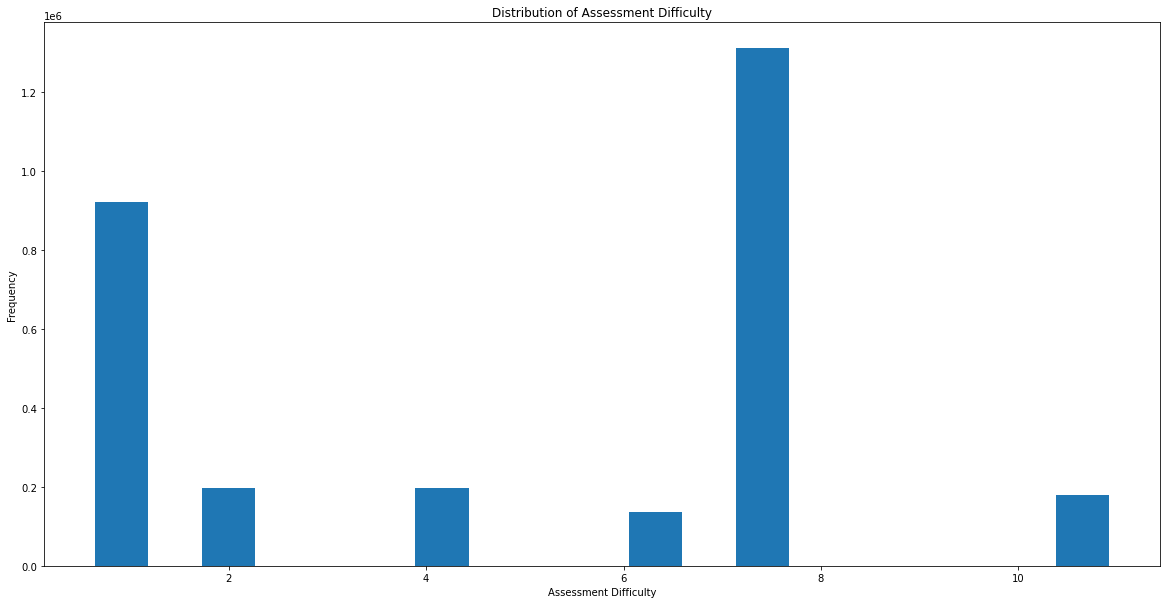

In [25]:
import seaborn as sns
import matplotlib

matplotlib.rcParams['figure.figsize'] = (20,10)
plt.hist(df3.assessment_difficulty,rwidth=0.5)
plt.title('Distribution of Assessment Difficulty')
plt.xlabel('Assessment Difficulty')
plt.ylabel('Frequency')
plt.show()

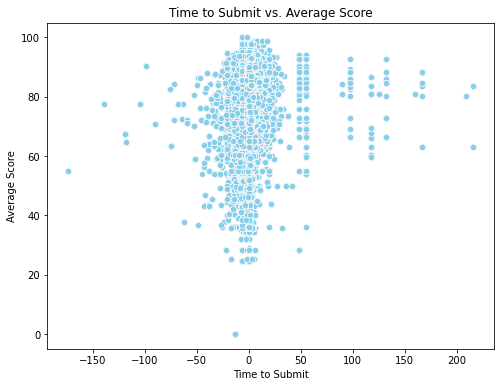

In [26]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='time_to_submit', y='average_score', data=df3, color='skyblue')
plt.title('Time to Submit vs. Average Score')
plt.xlabel('Time to Submit')
plt.ylabel('Average Score')
plt.show()

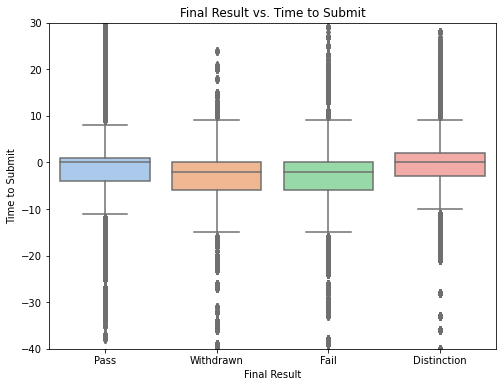

In [27]:
# Box plot for final_result vs. time_to_submit
plt.figure(figsize=(8, 6))
sns.boxplot(x='final_result', y='time_to_submit', data=df3, palette='pastel')
plt.title('Final Result vs. Time to Submit')
plt.xlabel('Final Result')
plt.ylabel('Time to Submit')
plt.ylim(-40, 30)
plt.show()


In [28]:
# Create a binary feature indicating early or late submission
df3['early_submission'] = (df3['time_to_submit'] < 0).astype(int)
df3.head()

,id_student,id_assessment,code_module,code_presentation,date_registration,num_of_prev_attempts,studied_credits,assessment_type,date_x,weight,...,weighted_grade,average_weighted_grades,avg_date_interaction,avg_sum_click,time_to_submit,assessment_difficulty,average_score,code_module_mean_score,code_presentation_mean_score,early_submission
0,11391,1752,AAA,2013J,-159.0,0,240,TMA,19.0,10.0,...,7.8,16.48,102.132653,4.765306,1.0,3.731343,82.0,72.979159,75.186457,0
1,11391,1752,AAA,2013J,-159.0,0,240,TMA,19.0,10.0,...,7.8,16.48,102.132653,4.765306,1.0,3.731343,82.0,72.979159,75.186457,0
2,11391,1752,AAA,2013J,-159.0,0,240,TMA,19.0,10.0,...,7.8,16.48,102.132653,4.765306,1.0,3.731343,82.0,72.979159,75.186457,0
3,11391,1752,AAA,2013J,-159.0,0,240,TMA,19.0,10.0,...,7.8,16.48,102.132653,4.765306,1.0,3.731343,82.0,72.979159,75.186457,0
4,11391,1752,AAA,2013J,-159.0,0,240,TMA,19.0,10.0,...,7.8,16.48,102.132653,4.765306,1.0,3.731343,82.0,72.979159,75.186457,0


In [29]:

failed_students_no_early_submission = df3[(df3['final_result'] == 'Fail')]

failed_students_no_early_submission.head()


,id_student,id_assessment,code_module,code_presentation,date_registration,num_of_prev_attempts,studied_credits,assessment_type,date_x,weight,...,weighted_grade,average_weighted_grades,avg_date_interaction,avg_sum_click,time_to_submit,assessment_difficulty,average_score,code_module_mean_score,code_presentation_mean_score,early_submission
43583,74372,1752,AAA,2013J,-50.0,0,150,TMA,19.0,10.0,...,6.0,8.2,83.902778,1.611111,-3.0,3.731343,48.5,72.979159,75.186457,1
43584,74372,1752,AAA,2013J,-50.0,0,150,TMA,19.0,10.0,...,6.0,8.2,83.902778,1.611111,-3.0,3.731343,48.5,72.979159,75.186457,1
43585,74372,1752,AAA,2013J,-50.0,0,150,TMA,19.0,10.0,...,6.0,8.2,83.902778,1.611111,-3.0,3.731343,48.5,72.979159,75.186457,1
43586,74372,1752,AAA,2013J,-50.0,0,150,TMA,19.0,10.0,...,6.0,8.2,83.902778,1.611111,-3.0,3.731343,48.5,72.979159,75.186457,1
43587,74372,1752,AAA,2013J,-50.0,0,150,TMA,19.0,10.0,...,6.0,8.2,83.902778,1.611111,-3.0,3.731343,48.5,72.979159,75.186457,1


In [30]:
failed_students_no_early_submission = df3[(df3['average_score'] <= 10)]

failed_students_no_early_submission.head()


,id_student,id_assessment,code_module,code_presentation,date_registration,num_of_prev_attempts,studied_credits,assessment_type,date_x,weight,...,weighted_grade,average_weighted_grades,avg_date_interaction,avg_sum_click,time_to_submit,assessment_difficulty,average_score,code_module_mean_score,code_presentation_mean_score,early_submission
2944126,2459051,14996,BBB,2013J,-60.0,1,60,TMA,19.0,5.0,...,0.0,0.0,-2.642857,2.0,-13.0,1.865672,0.0,81.878468,75.186457,1
2944127,2459051,14996,BBB,2013J,-60.0,1,60,TMA,19.0,5.0,...,0.0,0.0,-2.642857,2.0,-13.0,1.865672,0.0,81.878468,75.186457,1
2944128,2459051,14996,BBB,2013J,-60.0,1,60,TMA,19.0,5.0,...,0.0,0.0,-2.642857,2.0,-13.0,1.865672,0.0,81.878468,75.186457,1
2944129,2459051,14996,BBB,2013J,-60.0,1,60,TMA,19.0,5.0,...,0.0,0.0,-2.642857,2.0,-13.0,1.865672,0.0,81.878468,75.186457,1
2944130,2459051,14996,BBB,2013J,-60.0,1,60,TMA,19.0,5.0,...,0.0,0.0,-2.642857,2.0,-13.0,1.865672,0.0,81.878468,75.186457,1


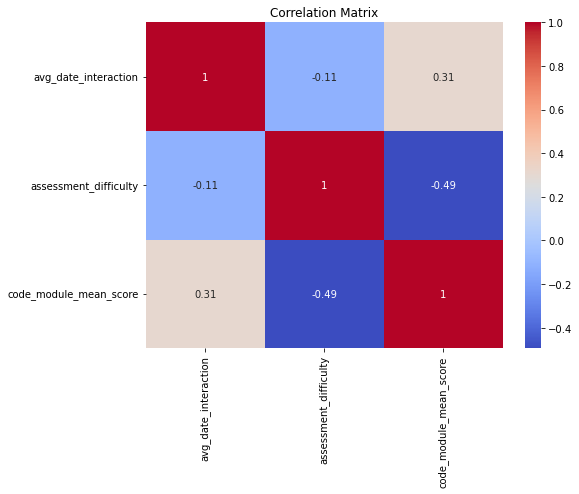

In [31]:
# Calculate correlation matrix
correlation_matrix = df3[['avg_date_interaction', 'assessment_difficulty', 'code_module_mean_score']].corr()

# Heatmap for correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


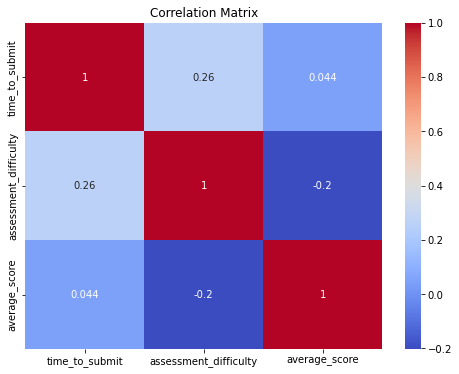

In [32]:
# Calculate correlation matrix
correlation_matrix = df3[['time_to_submit', 'assessment_difficulty', 'average_score']].corr()

# Heatmap for correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


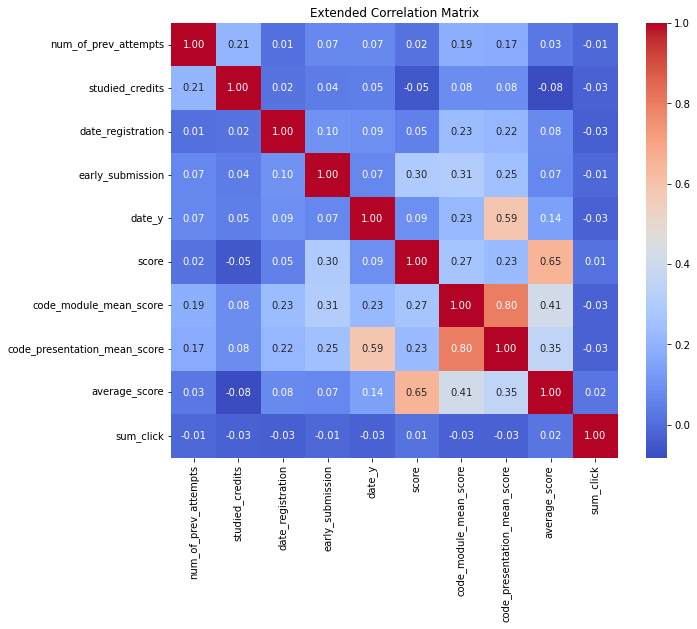

In [33]:
# Define additional fields for correlation analysis
additional_fields = ['num_of_prev_attempts', 'studied_credits', 'date_registration', 'early_submission', 
                     'date_y','score', 'code_module_mean_score', 'code_presentation_mean_score','average_score','sum_click']

# Include additional fields in the correlation matrix
correlation_matrix_additional = df3[additional_fields].corr()

# Heatmap for the extended correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_additional, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Extended Correlation Matrix')
plt.show()


In [34]:
# One-hot encode categorical variables
df3 = pd.get_dummies(df3, columns=['code_module', 'code_presentation', 'assessment_type'])
df3.head()

,id_student,id_assessment,date_registration,num_of_prev_attempts,studied_credits,date_x,weight,module_presentation_length,date_submitted,is_banked,...,code_module_mean_score,code_presentation_mean_score,early_submission,code_module_AAA,code_module_BBB,code_presentation_2013B,code_presentation_2013J,code_presentation_2014J,assessment_type_CMA,assessment_type_TMA
0,11391,1752,-159.0,0,240,19.0,10.0,268,18,0,...,72.979159,75.186457,0,1,0,0,1,0,0,1
1,11391,1752,-159.0,0,240,19.0,10.0,268,18,0,...,72.979159,75.186457,0,1,0,0,1,0,0,1
2,11391,1752,-159.0,0,240,19.0,10.0,268,18,0,...,72.979159,75.186457,0,1,0,0,1,0,0,1
3,11391,1752,-159.0,0,240,19.0,10.0,268,18,0,...,72.979159,75.186457,0,1,0,0,1,0,0,1
4,11391,1752,-159.0,0,240,19.0,10.0,268,18,0,...,72.979159,75.186457,0,1,0,0,1,0,0,1


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Assuming 'X' contains your features and 'y' contains the target variable
X = df3[['num_of_prev_attempts', 'early_submission','average_score','code_module_mean_score', 'code_presentation_mean_score']]
y = df3['final_result']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit a decision tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.92


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
# Decision Tree
dt_params = {'criterion': ['gini', 'entropy'], 'max_depth': [None, 5, 10, 15]}

# Random Forest
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [None, 5, 10, 15]}

# Gradient Boosting
gb_params = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]}

# Support Vector Machine
svc_params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}

# K-Nearest Neighbors
knn_params = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}


In [ ]:
models = {
    'Decision Tree': (DecisionTreeClassifier(), dt_params),
    'Random Forest': (RandomForestClassifier(), rf_params),
    'Gradient Boosting': (GradientBoostingClassifier(), gb_params),
    'Support Vector Machine': (SVC(), svc_params),
    'K-Nearest Neighbors': (KNeighborsClassifier(), knn_params)
}


In [ ]:
for name, (model, params) in models.items():
    grid_search = GridSearchCV(model, params, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    
    # Get the best model and its parameters
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    
    # Evaluate on the test set
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"{name}:\nBest Parameters: {best_params}\nTest Accuracy: {accuracy:.2f}\n")


In [50]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss

In [51]:
# Assuming 'X' contains your features and 'y' contains the target variable
X = df3[['num_of_prev_attempts', 'average_score', 'avg_date_interaction','avg_sum_click']]
y = df3['final_result']




# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [52]:
# Assuming 'Pass' is considered as 1 and 'Fail' as 0
y_train = y_train.map({'Pass': 1, 'Fail': 0})
y_test = y_test.map({'Pass': 1, 'Fail': 0})


In [53]:
print("NaN values in y_train:", y_train.isnull().sum())
print("NaN values in y_test:", y_test.isnull().sum())
# Assuming 'Pass' is considered as 1 and 'Fail' as 0


NaN values in y_train: 459161
NaN values in y_test: 196931


In [54]:
# Check for NaN values in y_train and y_test
print("NaN values in y_train:", y_train.isnull().sum())
print("NaN values in y_test:", y_test.isnull().sum())

# Handle NaN values
# For simplicity, let's fill NaN values with the mean
y_train = y_train.fillna(y_train.mean())
y_test = y_test.fillna(y_test.mean())

# Now, check if there are still NaN values
print("NaN values in y_train after handling:", y_train.isnull().sum())
print("NaN values in y_test after handling:", y_test.isnull().sum())



NaN values in y_train: 459161
NaN values in y_test: 196931
NaN values in y_train after handling: 0
NaN values in y_test after handling: 0


In [55]:
model = Sequential([
    Dense(8, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])


In [56]:
# Define EarlyStopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=2, validation_split=0.2, callbacks=[early_stopping])


Epoch 1/2
51502/51502 [==============================] - 115s 2ms/step - loss: 0.3141 - accuracy: 0.6985 - val_loss: 0.3055 - val_accuracy: 0.7003
Epoch 2/2
51502/51502 [==============================] - 115s 2ms/step - loss: 0.3048 - accuracy: 0.6996 - val_loss: 0.3035 - val_accuracy: 0.7018


In [59]:
# Evaluate on the test set
y_pred = model.predict(X_test)
y_test_classes = (y_pred > 0.5).astype(int)

accuracy = accuracy_score(y_test_classes, y_pred_classes)
logloss = log_loss(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Log Loss: {logloss:.2f}")


27590/27590 [==============================] - 39s 1ms/step


ValueError: Unknown label type: (2604490    0.000000
76146      1.000000
1742242    0.897806
2291662    1.000000
795095     1.000000
             ...   
2033527    0.897806
448353     1.000000
2837449    1.000000
1962971    1.000000
829474     1.000000
Name: final_result, Length: 882879, dtype: float64,)